In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


The goal for this week is to analyze mu austin housing data and utilize the regression techniques asked for the week and compare them, I will be using the price or most recent price as the target. 

In [2]:
df = pd.read_csv("austinHousingData.csv")



In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(15171, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa             

In [4]:
df = df.drop(columns=[col for col in df.columns if df[col].isnull().mean() > 0.5])
df = df.dropna()

In [5]:
features = ['numOfBedrooms', 'numOfBathrooms', 'lotSizeSqFt', 'livingAreaSqFt', 'yearBuilt', 'numOfStories']
target = 'latestPrice'


X = df[features]
y = df[target]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lasso = LassoCV(cv=5, random_state=42)
ridge = RidgeCV(cv=5)
elastic = ElasticNetCV(cv=5, random_state=42)


lin_reg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=42)

In [7]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} | RMSE: {np.sqrt(mse):.2f}, R2: {r2:.4f}")

evaluate(lin_reg, "Linear Regression")
evaluate(lasso, "Lasso")
evaluate(ridge, "Ridge")
evaluate(elastic, "Elastic Net")


models = {
    'Linear': lin_reg,
    'Lasso': lasso,
    'Ridge': ridge,
    'Elastic Net': elastic
}

Linear Regression | RMSE: 323559.19, R2: 0.4128
Lasso | RMSE: 357502.70, R2: 0.2832
Ridge | RMSE: 323579.71, R2: 0.4128
Elastic Net | RMSE: 421054.12, R2: 0.0057


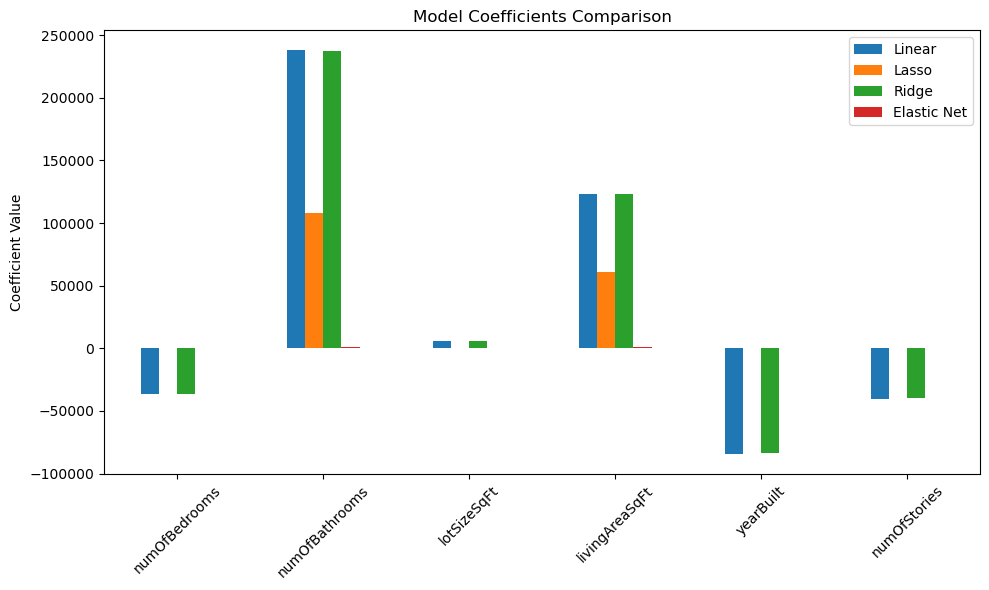


Top Insights:
- Regularization helps reduce overfitting by shrinking coefficients.
- Lasso can eliminate non-informative features.
- Ridge keeps all features but reduces their impact.
- Elastic Net combines both approaches.


In [8]:
coef_df = pd.DataFrame({name: model.coef_ for name, model in models.items()}, index=features)
coef_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Coefficients Comparison")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop Insights:")
print("- Regularization helps reduce overfitting by shrinking coefficients.")
print("- Lasso can eliminate non-informative features.")
print("- Ridge keeps all features but reduces their impact.")
print("- Elastic Net combines both approaches.")